In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Library

In [2]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
from sklearn.decomposition import PCA

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA


# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
from sklearn.utils import shuffle

np.random.seed(1635848)

In [3]:
# fetch the training file
file_path_full_training_set = '/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt'
file_path_test = '/content/drive/MyDrive/NSL-KDD/KDDTest+.txt'

In [4]:
#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [5]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
df.columns = columns
test_df.columns = columns

In [7]:
df.shape

(125972, 43)

In [8]:
test_df.shape

(22543, 43)

In [9]:
pd.set_option('display.max_columns', 43)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [11]:
test_df.shape

(22543, 43)

In [12]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')


In [14]:
pd.set_option('display.max_rows', 23)
print('Label distribution Training set:')
print(df['attack'].value_counts())

Label distribution Training set:
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64


In [15]:
print('Label distribution Test set:')
print(test_df['attack'].value_counts())

Label distribution Test set:
normal          9711
neptune         4656
guess_passwd    1231
mscan            996
warezmaster      944
                ... 
perl               2
sqlattack          2
udpstorm           2
phf                2
imap               1
Name: attack, Length: 38, dtype: int64


In [16]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
Name: service, dtype: int64


In [17]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack' has 38 categories


In [18]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ


In [19]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(test_df.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [20]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


In [21]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
trainservice=df['service'].tolist()
testservice= test_df['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_urh_i',
 'service_red_i',
 'service_http_2784',
 'service_harvest',
 'service_http_8001']

In [23]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22543, 84)

In [24]:

newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125972, 124)
(22543, 124)


In [25]:
newdf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# take label column
labeldf=newdf['attack']
labeldf_test=newdf_test['attack']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['attack'] = newlabeldf
newdf_test['attack'] = newlabeldf_test
print(newdf['attack'].head())

0    0
1    1
2    0
3    0
4    1
Name: attack, dtype: int64


In [27]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 124)
Dimensions of Probe: (78998, 124)
Dimensions of R2L: (68337, 124)
Dimensions of U2R: (67394, 124)
Test:
Dimensions of DoS: (17170, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


In [28]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('attack',1)
Y_DoS = DoS_df.attack
X_Probe = Probe_df.drop('attack',1)
Y_Probe = Probe_df.attack
X_R2L = R2L_df.drop('attack',1)
Y_R2L = R2L_df.attack
X_U2R = U2R_df.drop('attack',1)
Y_U2R = U2R_df.attack
# test set
X_DoS_test = DoS_df_test.drop('attack',1)
Y_DoS_test = DoS_df_test.attack
X_Probe_test = Probe_df_test.drop('attack',1)
Y_Probe_test = Probe_df_test.attack
X_R2L_test = R2L_df_test.drop('attack',1)
Y_R2L_test = R2L_df_test.attack
X_U2R_test = U2R_df_test.drop('attack',1)
Y_U2R_test = U2R_df_test.attack

<ipython-input-28-24822c7f9b4f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS = DoS_df.drop('attack',1)
<ipython-input-28-24822c7f9b4f>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Probe = Probe_df.drop('attack',1)
<ipython-input-28-24822c7f9b4f>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_R2L = R2L_df.drop('attack',1)
<ipython-input-28-24822c7f9b4f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_U2R = U2R_df.drop('attack',1)
<ipython-input-28-24822c7f9b4f>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS_test = DoS_df_te

In [29]:
X_DoS.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
p = X_DoS.columns

In [31]:
Y_DoS.shape

(113269,)

In [32]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [33]:
len(colNames_test)

123

In [34]:
len(colNames)

123

In [35]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [36]:
print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]


In [37]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

In [38]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 16  45  64  67  69  87 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(113269, 13)

In [39]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

In [40]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78998, 13)

In [41]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [42]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  4  16  44  45  47  48  49  50  51  52  55  58  59  63  64  65  67  68
  69  71  72  73  74  75  77  78  79  80  81  82  83  84  87  88  90  93
  94  97  99 100 101 108 109 110 111 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68337, 13)

In [43]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [44]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  4  16  44  45  47  48  49  50  51  52  55  58  59  63  64  65  67  68
  69  71  72  73  74  75  76  77  78  79  80  81  82  83  84  87  88  90
  93  94  97  99 100 101 108 109 110 111 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(67394, 13)

In [45]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_ftp_data',
 'service_http',
 'service_telnet']

In [46]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rat

In [47]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'same_srv_rate'), (2, 'count'), (3, 'flag_SF'), (4, 'dst_host_serror_rate'), (5, 'dst_host_same_srv_rate'), (6, 'dst_host_srv_count'), (7, 'dst_host_count'), (8, 'logged_in'), (9, 'serror_rate'), (10, 'dst_host_srv_serror_rate'), (11, 'srv_serror_rate'), (12, 'service_http'), (13, 'flag_S0')]


In [48]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'level'), (2, 'dst_host_diff_srv_rate'), (3, 'service_private'), (4, 'dst_host_srv_count'), (5, 'logged_in'), (6, 'dst_host_rerror_rate'), (7, 'dst_host_same_src_port_rate'), (8, 'service_eco_i'), (9, 'flag_SF'), (10, 'rerror_rate'), (11, 'dst_host_srv_rerror_rate'), (12, 'Protocol_type_icmp'), (13, 'srv_rerror_rate')]


In [49]:
rfe.fit(X_newR2L, Y_R2L)

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'level'), (2, 'dst_host_srv_diff_host_rate'), (3, 'dst_host_same_src_port_rate'), (4, 'hot'), (5, 'service_ftp_data'), (6, 'dst_host_srv_count'), (7, 'dst_bytes'), (8, 'service_imap4'), (9, 'num_failed_logins'), (10, 'is_guest_login'), (11, 'service_ftp'), (12, 'flag_RSTO'), (13, 'service_http')]


In [50]:
rfe.fit(X_newU2R, Y_U2R)

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'level'), (2, 'dst_host_srv_count'), (3, 'hot'), (4, 'num_file_creations'), (5, 'dst_host_count'), (6, 'service_ftp_data'), (7, 'dst_host_srv_diff_host_rate'), (8, 'dst_host_same_src_port_rate'), (9, 'service_telnet'), (10, 'service_http'), (11, 'num_shells'), (12, 'root_shell'), (13, 'urgent')]


In [51]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [52]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'Protocol_type_icmp'), (1, 'dst_host_diff_srv_rate'), (1, 'dst_host_rerror_rate'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_rerror_rate'), (1, 'flag_SF'), (1, 'level'), (1, 'logged_in'), (1, 'rerror_rate'), (1, 'service_eco_i'), (1, 'service_private'), (1, 'srv_rerror_rate')]


In [53]:
rfe.fit(X_newR2L, Y_R2L)

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'dst_bytes'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'flag_RSTO'), (1, 'hot'), (1, 'is_guest_login'), (1, 'level'), (1, 'num_failed_logins'), (1, 'service_ftp'), (1, 'service_ftp_data'), (1, 'service_http'), (1, 'service_imap4')]


In [54]:
rfe.fit(X_newU2R, Y_U2R)

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'dst_host_count'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'hot'), (1, 'level'), (1, 'num_file_creations'), (1, 'num_shells'), (1, 'root_shell'), (1, 'service_ftp_data'), (1, 'service_http'), (1, 'service_telnet'), (1, 'urgent')]


In [55]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [56]:
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [57]:
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [58]:
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [59]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'count', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'level', 'service_X11', 'service_ecr_i', 'service_ftp_data']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'level', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'num_root', 'serror_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'level', 'service_ftp_data']

Features selected for U2R: ['dst_bytes', 'num_compromised', 'count', 'dst_host_count', 'dst_host_srv_diff_host_rate', 'level', 'service_ftp_data', 'service_nntp', 'service_ntp_u', 'service_other', 'service_urh_i', 'flag_S

In [60]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113269, 13)
(78998, 13)
(68337, 13)
(67394, 13)


In [61]:
Y_DoS.shape

(113269,)

In [62]:
# all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [63]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [64]:
!pip install lazypredict

In [65]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9454,257
1,1667,5792


In [66]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,2861,6850
2,164,2257


In [67]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9692,19
3,2875,10


In [68]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,59,8


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99738 (+/- 0.00251)
Precision: 0.99626 (+/- 0.00392)
Recall: 0.99772 (+/- 0.00433)
F-measure: 0.99699 (+/- 0.00289)


In [70]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99769 (+/- 0.00178)
Precision: 0.99655 (+/- 0.00410)
Recall: 0.99623 (+/- 0.00222)
F-measure: 0.99639 (+/- 0.00277)


In [71]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99714 (+/- 0.00286)
Precision: 0.99537 (+/- 0.00413)
Recall: 0.99656 (+/- 0.00488)
F-measure: 0.99596 (+/- 0.00404)


In [72]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99847 (+/- 0.00333)
Precision: 0.93886 (+/- 0.11895)
Recall: 0.95549 (+/- 0.14716)
F-measure: 0.94502 (+/- 0.12321)


In [73]:
%matplotlib inline

Automatically created module for IPython interactive environment


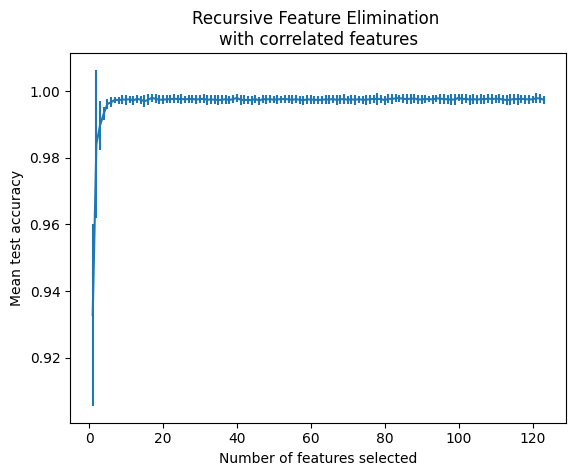

In [74]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_DoS = RFECV(estimator=clf_DoS, step=1, cv=10, scoring='accuracy')
rfecv_DoS.fit(X_DoS_test, Y_DoS_test)

n_scores = len(rfecv_DoS.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_DoS.cv_results_["mean_test_score"],
    yerr=rfecv_DoS.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

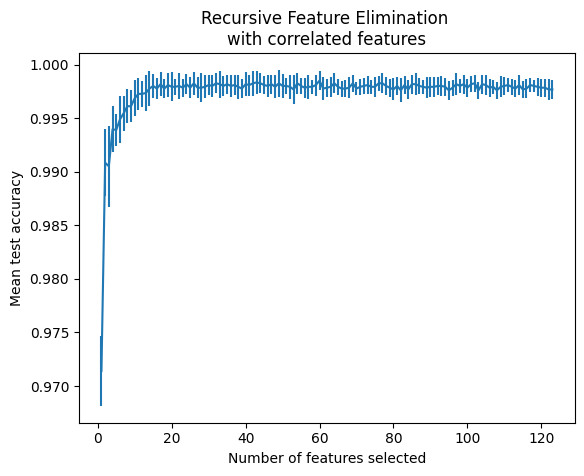

In [75]:
rfecv_Probe = RFECV(estimator=clf_Probe, step=1, cv=10, scoring='accuracy')
rfecv_Probe.fit(X_Probe_test, Y_Probe_test)
# Plot number of features VS. cross-validation scores
n_scores = len(rfecv_Probe.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_Probe.cv_results_["mean_test_score"],
    yerr=rfecv_Probe.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

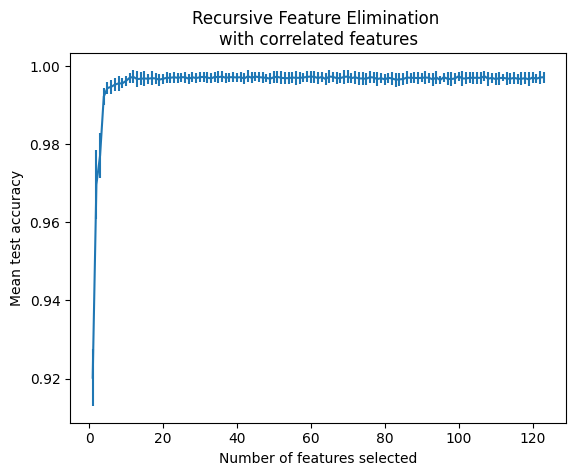

In [76]:
rfecv_R2L = RFECV(estimator=clf_R2L, step=1, cv=10, scoring='accuracy')
rfecv_R2L.fit(X_R2L_test, Y_R2L_test)
# Plot number of features VS. cross-validation scores
n_scores = len(rfecv_R2L.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_R2L.cv_results_["mean_test_score"],
    yerr=rfecv_R2L.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

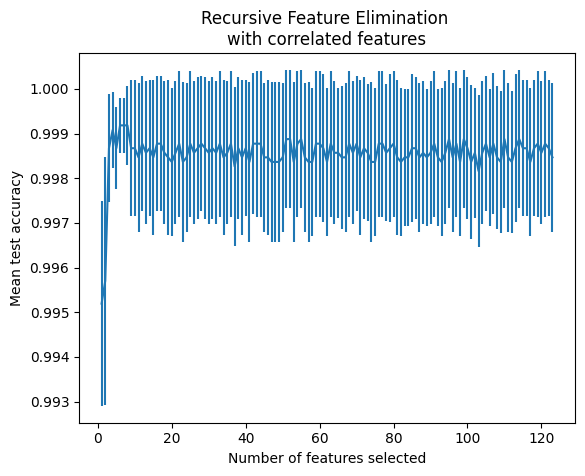

In [77]:
rfecv_U2R = RFECV(estimator=clf_U2R, step=1, cv=10, scoring='accuracy')
rfecv_U2R.fit(X_U2R_test, Y_U2R_test)
n_scores = len(rfecv_U2R.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_U2R.cv_results_["mean_test_score"],
    yerr=rfecv_U2R.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [78]:
# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
X_U2R_test2.shape

(9778, 13)

In [79]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9148,563
1,1701,5758


In [80]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8644,1067
2,818,1603


In [81]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2875,10


In [82]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,59,8


In [83]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99785 (+/- 0.00209)
Precision: 0.99719 (+/- 0.00279)
Recall: 0.99785 (+/- 0.00299)
F-measure: 0.99752 (+/- 0.00240)


In [84]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99580 (+/- 0.00290)
Precision: 0.99308 (+/- 0.00652)
Recall: 0.99381 (+/- 0.00500)
F-measure: 0.99343 (+/- 0.00453)


In [85]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)
Precision: 0.99001 (+/- 0.00583)
Recall: 0.99023 (+/- 0.00657)
F-measure: 0.99011 (+/- 0.00530)


In [86]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99877 (+/- 0.00200)
Precision: 0.96660 (+/- 0.08669)
Recall: 0.94736 (+/- 0.12001)
F-measure: 0.95319 (+/- 0.07663)


In [87]:
from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99785 (+/- 0.00209)


In [88]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99580 (+/- 0.00290)


In [89]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)


In [90]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99877 (+/- 0.00200)


CV DOS

In [91]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99715 (+/- 0.00035)


In [92]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99744 (+/- 0.00100)


In [93]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99785 (+/- 0.00209)


In [94]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99761 (+/- 0.00306)


In [95]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99738 (+/- 0.00562)


CV Probe

In [96]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99431 (+/- 0.00445)


In [97]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99604 (+/- 0.00298)


In [98]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99580 (+/- 0.00290)


In [99]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99637 (+/- 0.00473)


In [100]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99637 (+/- 0.00731)


# CV R2L

In [101]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99095 (+/- 0.00191)


In [102]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99270 (+/- 0.00217)


In [103]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)


In [104]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99325 (+/- 0.00977)


In [105]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99365 (+/- 0.00940)


CV U2R

In [106]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99857 (+/- 0.00041)


In [107]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99847 (+/- 0.00145)


In [108]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99877 (+/- 0.00200)


In [109]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99898 (+/- 0.00330)


In [110]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99908 (+/- 0.00489)


ANN without ref

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.python.keras import regularizers

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/ANN1_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import BatchNormalization
ann =Sequential()
ann.add(Dense(units = 256,input_dim=123,activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))),
keras.layers.Dropout(0.3),
keras.layers.BatchNormalization(),
ann.add(Dense(units = 128,activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))),
keras.layers.Dropout(0.3),
keras.layers.BatchNormalization(),
ann.add(Dense(units = 64,activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))),
keras.layers.Dropout(0.3),
keras.layers.BatchNormalization(),
ann.add(Dense(units = 32,activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))),
keras.layers.Dropout(0.3),
keras.layers.BatchNormalization(),
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model=ann.fit(X_DoS, Y_DoS,batch_size = 250, validation_data=(X_DoS_test, Y_DoS_test),epochs =50,callbacks = [my_callbacks])

Epoch 1/50
452/454 [============================>.] - ETA: 0s - loss: 0.0580 - accuracy: 0.9946
Epoch 1: val_accuracy improved from -inf to 0.92370, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5
454/454 [==============================] - 11s 8ms/step - loss: 0.0579 - accuracy: 0.9946 - val_loss: 0.3957 - val_accuracy: 0.9237
Epoch 2/50
 20/454 [>.............................] - ETA: 2s - loss: 0.0314 - accuracy: 0.9992

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/regularizers.py:426: UserWarning: The `keras.regularizers.serialize()` API should only be used for objects of type `keras.regularizers.Regularizer`. Found an instance of type <class 'tensorflow.python.keras.regularizers.L2'>, which may lead to improper serialization.
  warnings.warn(


450/454 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9992
Epoch 2: val_accuracy improved from 0.92370 to 0.93722, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5
454/454 [==============================] - 2s 5ms/step - loss: 0.0268 - accuracy: 0.9992 - val_loss: 0.3293 - val_accuracy: 0.9372
Epoch 3/50
452/454 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9994
Epoch 3: val_accuracy did not improve from 0.93722
454/454 [==============================] - 2s 5ms/step - loss: 0.0179 - accuracy: 0.9994 - val_loss: 0.3333 - val_accuracy: 0.9242
Epoch 4/50
453/454 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9993
Epoch 4: val_accuracy did not improve from 0.93722
454/454 [==============================] - 2s 4ms/step - loss: 0.0130 - accuracy: 0.9993 - val_loss: 0.3668 - val_accuracy: 0.9307
Epoch 5/50
447/454 [============================>.] - ETA: 0s - loss: 0.0093 - accuracy: 0.9995
Epoch 5: val_

In [ ]:
y_pred = ann.predict(X_DoS_test)

537/537 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([[9.9991953e-01],
       [4.8513443e-06],
       [7.9278016e-06],
       ...,
       [1.0502806e-05],
       [7.1624845e-01],
       [1.4565923e-05]], dtype=float32)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      9711
           1       0.93      0.87      0.90      7459

    accuracy                           0.91     17170
   macro avg       0.92      0.91      0.91     17170
weighted avg       0.92      0.91      0.91     17170



ANN with Ref

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/ANN1ref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
X_rfeDoS.shape

(113269, 13)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Create a Sequential model
ann = Sequential()

# Add layers to the model with the specified configurations
ann.add(Dense(units=256, input_dim=13, activation='relu', kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
# ann.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))
# ann.add(Dropout(0.3))
# ann.add(BatchNormalization())
ann.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
# ann.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
# ann.add(Dropout(0.3))
ann.add(BatchNormalization())
ann.add(Dense(units=1, activation='sigmoid'))

# Your model is now defined with the desired layers and configurations.


In [ ]:
ann.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model=ann.fit(X_rfeDoS, Y_DoS,batch_size = 64, validation_data=(X_DoS_test2, Y_DoS_test),epochs =50,callbacks = [my_callbacks])

Epoch 1/50
1762/1770 [============================>.] - ETA: 0s - loss: 0.0672 - accuracy: 0.9926
Epoch 1: val_accuracy improved from -inf to 0.89138, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1770/1770 [==============================] - 17s 6ms/step - loss: 0.0671 - accuracy: 0.9926 - val_loss: 0.5667 - val_accuracy: 0.8914
Epoch 2/50
1761/1770 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9950
Epoch 2: val_accuracy did not improve from 0.89138
1770/1770 [==============================] - 12s 7ms/step - loss: 0.0276 - accuracy: 0.9950 - val_loss: 0.6926 - val_accuracy: 0.8849
Epoch 3/50
1769/1770 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9956
Epoch 3: val_accuracy improved from 0.89138 to 0.89313, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5
1770/1770 [==============================] - 12s 7ms/step - loss: 0.0239 - accuracy: 0.9956 - val_loss: 0.5952 - val_accuracy: 0.8931
Epoch 4/50
1766/1770 [============================>.] - ETA: 0s - loss: 0.0229 - accuracy: 0.9960
Epoch 4: val_accuracy did not improve from 0.89313
1770/1770 [==============================] - 11s 6ms/step - loss: 0.0230 - accur

KeyboardInterrupt: ignored

In [ ]:
y_pred = ann.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      9711
           1       0.99      0.73      0.84      7459

    accuracy                           0.88     17170
   macro avg       0.91      0.86      0.87     17170
weighted avg       0.90      0.88      0.88     17170



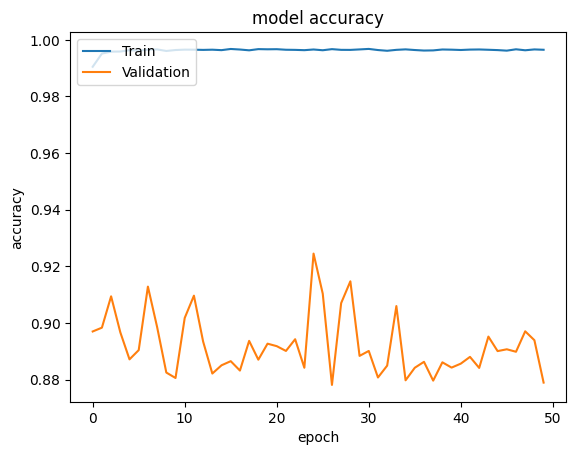

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withoutref.png')
plt.show()


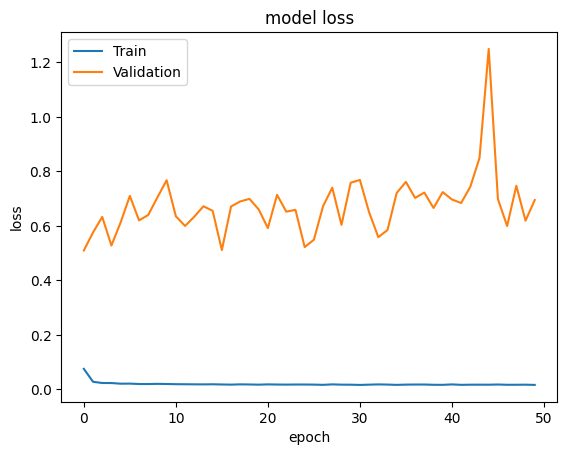

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withoutref.png')
plt.show()

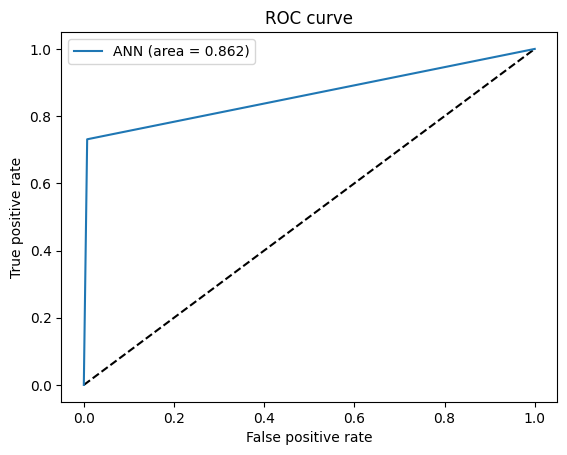

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN (area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

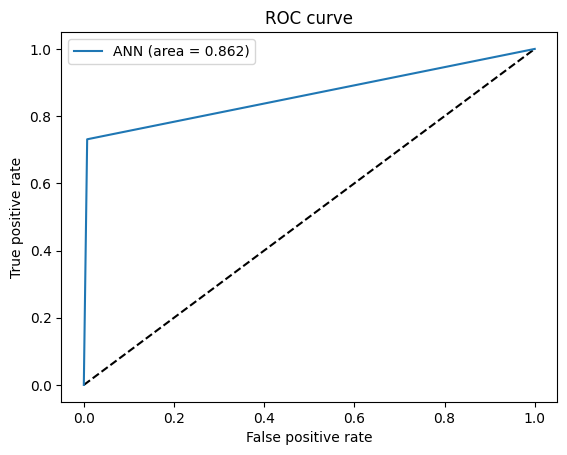

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN (area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

LSTM-CNN Without ref

In [113]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [114]:
Y_DoS = np.array(Y_DoS)

In [115]:
Y_DoS_test = np.array(Y_DoS_test)

In [116]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [117]:
# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))

In [118]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the rest of your callbacks
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/cnnlstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
    early_stopping,
    lr_scheduler
]

In [ ]:
# from keras.callbacks import ModelCheckpoint
# my_callbacks = [
#     ModelCheckpoint(filepath='/content/drive/MyDrive/check/cnnlstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
# ]

In [125]:
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# from keras.regularizers import l2

# model = Sequential() # initializing model

# # cnn-lstm
# model.add(Conv1D(64, 3, padding="same", input_shape=(X_DoS.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))  # Add dropout to reduce overfitting
# model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_DoS, Y_DoS, epochs=50, batch_size=64, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


# Initialize the model
model = Sequential()

# Add Convolutional and MaxPooling Layers with L2 Regularization
model.add(Conv1D(64, 3, padding="same", input_shape=(X_DoS.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))

# Add Batch Normalization
model.add(BatchNormalization())

# Add LSTM layer with L2 Regularization
model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting

# Add Dense layer with L2 Regularization
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model with a custom learning rate schedule
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
history = model.fit(X_DoS, Y_DoS, epochs=50, batch_size=64, validation_data=(X_DoS_test, Y_DoS_test), callbacks=my_callbacks)


Epoch 1/50
1770/1770 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.9897
Epoch 1: val_accuracy improved from -inf to 0.89511, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1770/1770 [==============================] - 37s 15ms/step - loss: 0.2282 - accuracy: 0.9897 - val_loss: 0.4956 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 2/50
1766/1770 [============================>.] - ETA: 0s - loss: 0.0670 - accuracy: 0.9951
Epoch 2: val_accuracy did not improve from 0.89511
1770/1770 [==============================] - 18s 10ms/step - loss: 0.0670 - accuracy: 0.9951 - val_loss: 1.4301 - val_accuracy: 0.5655 - lr: 0.0010
Epoch 3/50
1769/1770 [============================>.] - ETA: 0s - loss: 0.0544 - accuracy: 0.9948
Epoch 3: val_accuracy did not improve from 0.89511
1770/1770 [==============================] - 29s 16ms/step - loss: 0.0544 - accuracy: 0.9948 - val_loss: 0.5402 - val_accuracy: 0.8942 - lr: 0.0010
Epoch 4/50
1770/1770 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9964
Epoch 4: val_accuracy did not improve from 0.89511
1770/1770 [==============================] - 26s 14ms/step - loss: 0.0457 - accuracy: 0.9964 - val_loss: 0.92

In [126]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/check/cnnlstmk_intrusion.h5')

In [127]:
y_pred = model.predict(X_DoS_test)

537/537 [==============================] - 3s 4ms/step


In [128]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [129]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [130]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9711
           1       0.98      0.91      0.94      7459

    accuracy                           0.95     17170
   macro avg       0.96      0.95      0.95     17170
weighted avg       0.96      0.95      0.95     17170



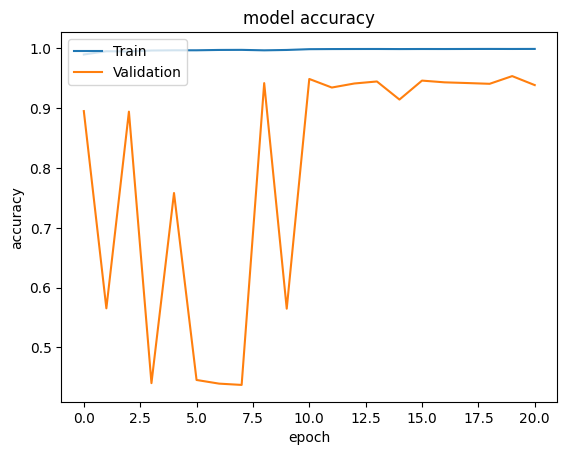

In [131]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withoutref.png')
plt.show()


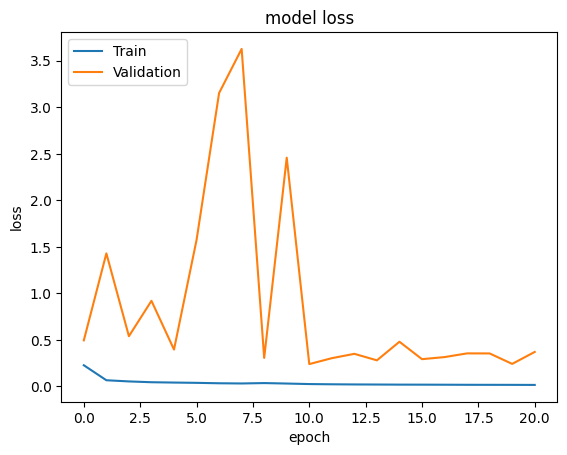

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withoutref.png')
plt.show()

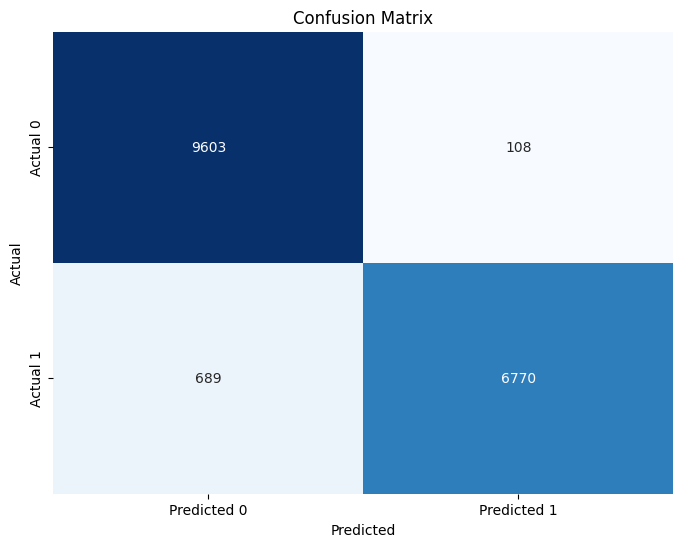

In [133]:
from matplotlib import pylab
from pylab import *
cm = confusion_matrix(Y_DoS_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('heatmap_withoutref.png')
plt.show()

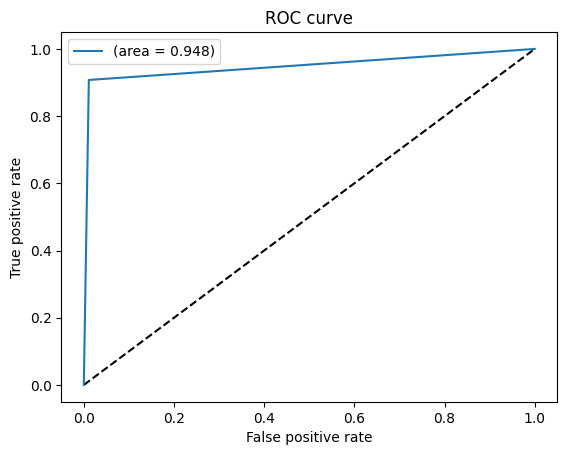

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_withoutref.png')
plt.show()

LSTM-CNN With ref

In [140]:
X_rfeDoS.shape

(113269, 13, 1)

In [141]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [142]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))


In [143]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the rest of your callbacks
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
    early_stopping,
    lr_scheduler
]

In [144]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define a learning rate schedule
initial_learning_rate = 0.001

# Initialize the model
model = Sequential()

input_shape = (X_rfeDoS.shape[1], 1)

# Convolutional layers
model.add(Conv1D(64, 3, padding="same", input_shape=input_shape, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 3, padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

# LSTM layer
# model.add(GRU(units=150, return_sequences=False, dropout=0.25, recurrent_dropout=0.25))
model.add(LSTM(units=150, dropout=0.2, return_sequences=False))

# Dense layer
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
# callbacks_list = [early_stopping, reduce_lr]

# Train the model
history = model.fit(X_rfeDoS, Y_DoS, epochs=100, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=my_callbacks)

Epoch 1/100
454/454 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9866
Epoch 1: val_accuracy improved from -inf to 0.88765, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/454 [==============================] - 11s 13ms/step - loss: 0.0496 - accuracy: 0.9866 - val_loss: 0.5156 - val_accuracy: 0.8877
Epoch 2/100
454/454 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9954
Epoch 2: val_accuracy improved from 0.88765 to 0.89400, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5
454/454 [==============================] - 9s 20ms/step - loss: 0.0201 - accuracy: 0.9954 - val_loss: 0.4967 - val_accuracy: 0.8940
Epoch 3/100
451/454 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9969
Epoch 3: val_accuracy improved from 0.89400 to 0.90303, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5
454/454 [==============================] - 5s 10ms/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.4640 - val_accuracy: 0.9030
Epoch 4/100
449/454 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9974
Epoch 4: val_accuracy improved from 0.90303 to 0.91165, saving

In [145]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5')

In [146]:
y_pred = model.predict(X_DoS_test2)

537/537 [==============================] - 3s 4ms/step


In [147]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [148]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [149]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9711
           1       0.99      0.82      0.89      7459

    accuracy                           0.92     17170
   macro avg       0.93      0.90      0.91     17170
weighted avg       0.92      0.92      0.91     17170



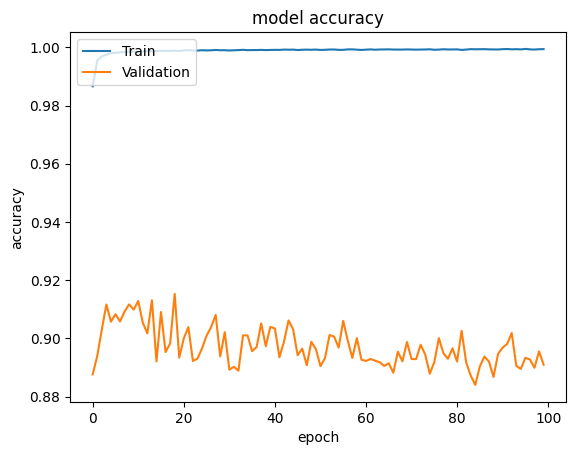

In [150]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withref.png')
plt.show()


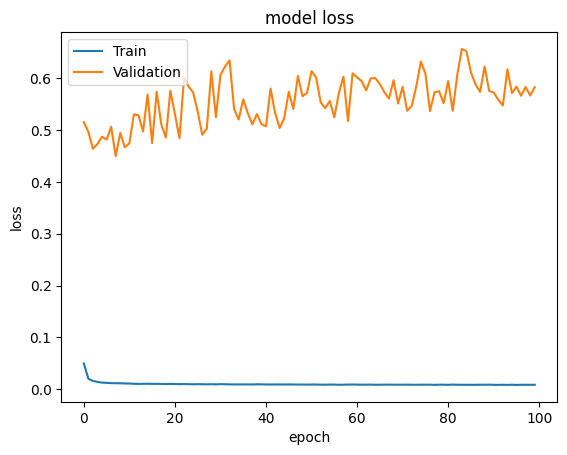

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withref.png')
plt.show()

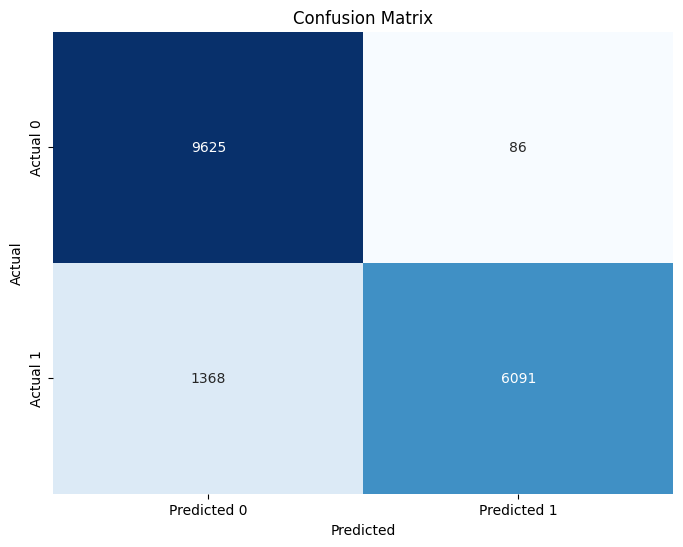

In [152]:
from matplotlib import pylab
from pylab import *
cm = confusion_matrix(Y_DoS_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('heatmap_withref.png')
plt.show()

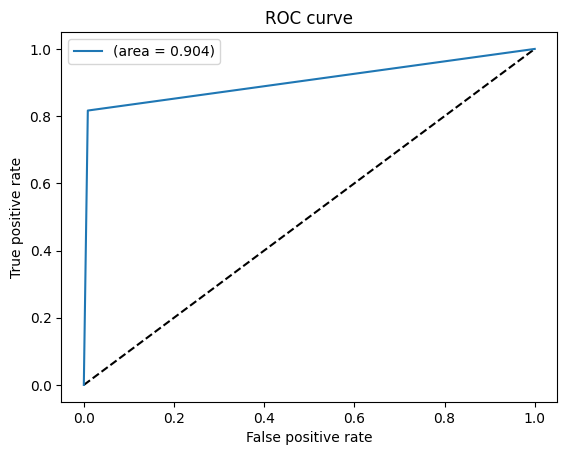

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_withref.png')

plt.show()

Bi-LSTM without ref

In [ ]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [ ]:
Y_DoS = np.array(Y_DoS)

In [ ]:
Y_DoS_test = np.array(Y_DoS_test)

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bilstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# BiLSTM layer
model.add(Bidirectional(LSTM(units=100, dropout=0.2, return_sequences=False), input_shape=(X_DoS.shape[1], 1)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


Epoch 1/50
452/454 [============================>.] - ETA: 0s - loss: 0.1657 - accuracy: 0.9382
Epoch 1: val_accuracy improved from -inf to 0.85312, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5
454/454 [==============================] - 14s 22ms/step - loss: 0.1655 - accuracy: 0.9383 - val_loss: 0.3883 - val_accuracy: 0.8531
Epoch 2/50
  7/454 [..............................] - ETA: 8s - loss: 0.1240 - accuracy: 0.9554

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/454 [============================>.] - ETA: 0s - loss: 0.0666 - accuracy: 0.9771
Epoch 2: val_accuracy improved from 0.85312 to 0.87833, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5
454/454 [==============================] - 9s 19ms/step - loss: 0.0664 - accuracy: 0.9772 - val_loss: 0.3123 - val_accuracy: 0.8783
Epoch 3/50
451/454 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9850
Epoch 3: val_accuracy improved from 0.87833 to 0.89662, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5
454/454 [==============================] - 9s 20ms/step - loss: 0.0442 - accuracy: 0.9850 - val_loss: 0.2999 - val_accuracy: 0.8966
Epoch 4/50
454/454 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9888
Epoch 4: val_accuracy did not improve from 0.89662
454/454 [==============================] - 9s 19ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.3381 - val_accuracy: 0.8831
Epoch 5/50
451/454 [============

In [ ]:
y_pred = model.predict(X_DoS_test)

537/537 [==============================] - 8s 10ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      9711
           1       0.98      0.78      0.87      7459

    accuracy                           0.90     17170
   macro avg       0.92      0.89      0.90     17170
weighted avg       0.91      0.90      0.90     17170



BI-LSTM With ref

In [ ]:
X_rfeDoS.shape

(113269, 13, 1)

In [ ]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)

In [ ]:
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [ ]:
X_DoS_test2.shape

(17170, 13, 1)

In [ ]:
X_rfeDoS.shape

(113269, 13, 1)

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bilstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# BiLSTM layer
model.add(Bidirectional(LSTM(units=100, dropout=0.2, return_sequences=False), input_shape=(X_rfeDoS.shape[1], 1)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50
451/454 [============================>.] - ETA: 0s - loss: 0.1502 - accuracy: 0.9354
Epoch 1: val_accuracy improved from -inf to 0.84782, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5
454/454 [==============================] - 9s 9ms/step - loss: 0.1498 - accuracy: 0.9356 - val_loss: 0.5551 - val_accuracy: 0.8478
Epoch 2/50
 16/454 [>.............................] - ETA: 2s - loss: 0.0721 - accuracy: 0.9705

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/454 [============================>.] - ETA: 0s - loss: 0.0572 - accuracy: 0.9794
Epoch 2: val_accuracy did not improve from 0.84782
454/454 [==============================] - 3s 7ms/step - loss: 0.0572 - accuracy: 0.9794 - val_loss: 0.6413 - val_accuracy: 0.8434
Epoch 3/50
449/454 [============================>.] - ETA: 0s - loss: 0.0456 - accuracy: 0.9843
Epoch 3: val_accuracy improved from 0.84782 to 0.86797, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5
454/454 [==============================] - 3s 8ms/step - loss: 0.0455 - accuracy: 0.9843 - val_loss: 0.4031 - val_accuracy: 0.8680
Epoch 4/50
453/454 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9882
Epoch 4: val_accuracy improved from 0.86797 to 0.86954, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5
454/454 [==============================] - 4s 8ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.4227 - val_accuracy: 0.8695
Epoch 5/50
450/454 [=========

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 200)               81600     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81801 (319.54 KB)
Trainable params: 81801 (319.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_DoS_test2)

537/537 [==============================] - 2s 3ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      9711
           1       0.91      0.79      0.85      7459

    accuracy                           0.88     17170
   macro avg       0.88      0.87      0.87     17170
weighted avg       0.88      0.88      0.87     17170



GRU without ref

In [ ]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [ ]:
Y_DoS = np.array(Y_DoS)

In [ ]:
Y_DoS_test = np.array(Y_DoS_test)

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/gruk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# GRU layers
model.add(GRU(units=64, dropout=0.2, return_sequences=True, input_shape=(X_DoS.shape[1], 1)))
model.add(GRU(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


Epoch 1/50
452/454 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9431
Epoch 1: val_accuracy improved from -inf to 0.58998, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5
454/454 [==============================] - 14s 21ms/step - loss: 0.1640 - accuracy: 0.9431 - val_loss: 1.3709 - val_accuracy: 0.5900
Epoch 2/50
  5/454 [..............................] - ETA: 7s - loss: 0.0855 - accuracy: 0.9704

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


452/454 [============================>.] - ETA: 0s - loss: 0.0915 - accuracy: 0.9711
Epoch 2: val_accuracy improved from 0.58998 to 0.60687, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5
454/454 [==============================] - 9s 20ms/step - loss: 0.0914 - accuracy: 0.9711 - val_loss: 1.4504 - val_accuracy: 0.6069
Epoch 3/50
 65/454 [===>..........................] - ETA: 6s - loss: 0.0692 - accuracy: 0.9792

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_DoS_test)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

GRU with ref

In [ ]:
X_rfeDoS.shape

(113269, 13, 1)

In [ ]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/grukref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# GRU layers
model.add(GRU(units=64, dropout=0.2, return_sequences=True, input_shape=(X_rfeDoS.shape[1], 1)))
model.add(GRU(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])


Epoch 1/50
451/454 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9483
Epoch 1: val_accuracy improved from -inf to 0.85568, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5
454/454 [==============================] - 8s 10ms/step - loss: 0.1353 - accuracy: 0.9484 - val_loss: 0.4243 - val_accuracy: 0.8557
Epoch 2/50
451/454 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9778
Epoch 2: val_accuracy improved from 0.85568 to 0.87746, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5
454/454 [==============================] - 4s 8ms/step - loss: 0.0659 - accuracy: 0.9779 - val_loss: 0.3225 - val_accuracy: 0.8775
Epoch 3/50
447/454 [============================>.] - ETA: 0s - loss: 0.0556 - accuracy: 0.9811
Epoch 3: val_accuracy did not improve from 0.87746
454/454 [==============================] - 3s 7ms/step - loss: 0.0553 - accuracy: 0.9811 - val_loss: 0.3639 - val_accuracy: 0.8706
Epoch 4/50
452/454 [======

In [ ]:
y_pred = model.predict(X_DoS_test2)

537/537 [==============================] - 2s 3ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9711
           1       0.86      0.81      0.84      7459

    accuracy                           0.86     17170
   macro avg       0.86      0.86      0.86     17170
weighted avg       0.86      0.86      0.86     17170



BiGRU without ref

In [ ]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [ ]:
Y_DoS = np.array(Y_DoS)

In [ ]:
Y_DoS_test = np.array(Y_DoS_test)

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bigruk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# Bidirectional GRU layers
model.add(Bidirectional(GRU(units=64, dropout=0.2, return_sequences=True), input_shape=(X_DoS.shape[1], 1)))
model.add(Bidirectional(GRU(units=128, dropout=0.2, return_sequences=False)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50
454/454 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9692
Epoch 1: val_accuracy improved from -inf to 0.90617, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5
454/454 [==============================] - 31s 39ms/step - loss: 0.0939 - accuracy: 0.9692 - val_loss: 0.3682 - val_accuracy: 0.9062
Epoch 2/50
453/454 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9920
Epoch 2: val_accuracy improved from 0.90617 to 0.91299, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5
454/454 [==============================] - 17s 37ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.4602 - val_accuracy: 0.9130
Epoch 3/50
453/454 [============================>.] - ETA: 0s - loss: 0.0197 - accuracy: 0.9940
Epoch 3: val_accuracy did not improve from 0.91299
454/454 [==============================] - 16s 36ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.5393 - val_accuracy: 0.9078
Epoch 4/50
453/454 [===

In [ ]:
y_pred = model.predict(X_DoS_test)

537/537 [==============================] - 8s 11ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      9711
           1       0.98      0.81      0.89      7459

    accuracy                           0.91     17170
   macro avg       0.93      0.90      0.91     17170
weighted avg       0.92      0.91      0.91     17170



BIGRU with ref

In [ ]:
X_rfeDoS.shape

(113269, 13, 1)

In [ ]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bigrukref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# Bidirectional GRU layers
model.add(Bidirectional(GRU(units=64, dropout=0.2, return_sequences=True), input_shape=(X_rfeDoS.shape[1], 1)))
model.add(Bidirectional(GRU(units=128, dropout=0.2, return_sequences=False)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50
453/454 [============================>.] - ETA: 0s - loss: 0.0988 - accuracy: 0.9594
Epoch 1: val_accuracy improved from -inf to 0.85620, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5
454/454 [==============================] - 14s 13ms/step - loss: 0.0988 - accuracy: 0.9594 - val_loss: 0.5705 - val_accuracy: 0.8562
Epoch 2/50
  5/454 [..............................] - ETA: 6s - loss: 0.0268 - accuracy: 0.9896 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


449/454 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9897
Epoch 2: val_accuracy improved from 0.85620 to 0.85871, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5
454/454 [==============================] - 5s 11ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.6919 - val_accuracy: 0.8587
Epoch 3/50
450/454 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9918
Epoch 3: val_accuracy improved from 0.85871 to 0.86191, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5
454/454 [==============================] - 4s 10ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.6205 - val_accuracy: 0.8619
Epoch 4/50
454/454 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9928
Epoch 4: val_accuracy improved from 0.86191 to 0.86878, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5
454/454 [==============================] - 6s 12ms/step - loss: 0.0224 - accuracy: 0.99

In [ ]:
y_pred = model.predict(X_DoS_test2)

537/537 [==============================] - 3s 4ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9711
           1       0.90      0.79      0.84      7459

    accuracy                           0.87     17170
   macro avg       0.88      0.86      0.87     17170
weighted avg       0.87      0.87      0.87     17170



LSTM without ref

In [ ]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [ ]:
Y_DoS = np.array(Y_DoS)

In [ ]:
Y_DoS_test = np.array(Y_DoS_test)

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/lstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# LSTM layers
model.add(LSTM(units=64, dropout=0.2, return_sequences=True, input_shape=(X_DoS.shape[1], 1)))
model.add(LSTM(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50
453/454 [============================>.] - ETA: 0s - loss: 0.2399 - accuracy: 0.9033
Epoch 1: val_accuracy improved from -inf to 0.49126, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5
454/454 [==============================] - 14s 22ms/step - loss: 0.2398 - accuracy: 0.9033 - val_loss: 1.7122 - val_accuracy: 0.4913
Epoch 2/50
  7/454 [..............................] - ETA: 7s - loss: 0.1160 - accuracy: 0.9549

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/454 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9723
Epoch 2: val_accuracy improved from 0.49126 to 0.59621, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5
454/454 [==============================] - 9s 20ms/step - loss: 0.0839 - accuracy: 0.9723 - val_loss: 1.3979 - val_accuracy: 0.5962
Epoch 3/50
451/454 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9824
Epoch 3: val_accuracy improved from 0.59621 to 0.63547, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5
454/454 [==============================] - 10s 23ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 1.4946 - val_accuracy: 0.6355
Epoch 4/50
454/454 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9869
Epoch 4: val_accuracy did not improve from 0.63547
454/454 [==============================] - 9s 20ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 1.1032 - val_accuracy: 0.6141
Epoch 5/50
451/454 [===============

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_DoS_test)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

LSTM with ref

In [ ]:
X_rfeDoS.shape

(113269, 13, 1)

In [ ]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/lstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# LSTM layers
model.add(LSTM(units=64, dropout=0.2, return_sequences=True, input_shape=(X_rfeDoS.shape[1], 1)))
model.add(LSTM(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50
454/454 [==============================] - ETA: 0s - loss: 0.1693 - accuracy: 0.9293
Epoch 1: val_accuracy improved from -inf to 0.84333, saving model to /content/drive/MyDrive/check/lstmkref_intrusion.h5
454/454 [==============================] - 9s 12ms/step - loss: 0.1693 - accuracy: 0.9293 - val_loss: 0.4826 - val_accuracy: 0.8433
Epoch 2/50
447/454 [============================>.] - ETA: 0s - loss: 0.0874 - accuracy: 0.9682
Epoch 2: val_accuracy did not improve from 0.84333
454/454 [==============================] - 3s 7ms/step - loss: 0.0874 - accuracy: 0.9683 - val_loss: 0.5528 - val_accuracy: 0.8424
Epoch 3/50
449/454 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9749
Epoch 3: val_accuracy improved from 0.84333 to 0.85242, saving model to /content/drive/MyDrive/check/lstmkref_intrusion.h5
454/454 [==============================] - 3s 7ms/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.3985 - val_accuracy: 0.8524
Epoch 4/50
452/454 [====

In [ ]:
y_pred = model.predict(X_DoS_test2)

537/537 [==============================] - 2s 3ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      9711
           1       0.90      0.80      0.85      7459

    accuracy                           0.87     17170
   macro avg       0.88      0.86      0.87     17170
weighted avg       0.87      0.87      0.87     17170



Ensembling with ref

In [ ]:
from keras.models import load_model
ann_ref = load_model('/content/drive/MyDrive/check/ANN1ref_intrusion.h5')

In [ ]:
y_pred = ann_ref.predict(X_DoS_test2)

537/537 [==============================] - 1s 2ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9711
           1       0.99      0.84      0.91      7459

    accuracy                           0.92     17170
   macro avg       0.94      0.91      0.92     17170
weighted avg       0.93      0.92      0.92     17170



In [ ]:
ann_ref.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [ ]:
from keras.models import load_model
cnnlstm_ref = load_model('/content/drive/MyDrive/check/cnnlstmkref_intrusion.h5')

In [ ]:
y_pred = cnnlstm_ref.predict(X_DoS_test2)

537/537 [==============================] - 2s 3ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      9711
           1       0.97      0.81      0.88      7459

    accuracy                           0.91     17170
   macro avg       0.92      0.89      0.90     17170
weighted avg       0.91      0.91      0.90     17170



In [ ]:
from keras.models import load_model
BIlstm_ref = load_model('/content/drive/MyDrive/check/bilstmkref_intrusion.h5')

In [ ]:
y_pred = BIlstm_ref.predict(X_DoS_test2)

537/537 [==============================] - 2s 3ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      9711
           1       0.98      0.83      0.90      7459

    accuracy                           0.92     17170
   macro avg       0.93      0.91      0.92     17170
weighted avg       0.92      0.92      0.92     17170



In [ ]:
from keras.models import load_model
gru_ref = load_model('/content/drive/MyDrive/check/grukref_intrusion.h5')

In [ ]:
y_pred = gru_ref.predict(X_DoS_test2)

537/537 [==============================] - 2s 3ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      9711
           1       0.96      0.86      0.91      7459

    accuracy                           0.92     17170
   macro avg       0.93      0.92      0.92     17170
weighted avg       0.93      0.92      0.92     17170



In [ ]:
from keras.models import load_model
bigru_ref = load_model('/content/drive/MyDrive/check/bigrukref_intrusion.h5')

In [ ]:
y_pred = bigru_ref.predict(X_DoS_test2)

537/537 [==============================] - 3s 4ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      9711
           1       0.98      0.83      0.90      7459

    accuracy                           0.92     17170
   macro avg       0.93      0.91      0.92     17170
weighted avg       0.92      0.92      0.92     17170



In [ ]:
from keras.models import load_model
lstm_ref = load_model('/content/drive/MyDrive/check/lstmkref_intrusion.h5')

In [ ]:
y_pred = lstm_ref.predict(X_DoS_test2)

537/537 [==============================] - 3s 4ms/step


In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      9711
           1       0.96      0.76      0.85      7459

    accuracy                           0.88     17170
   macro avg       0.90      0.87      0.87     17170
weighted avg       0.89      0.88      0.88     17170



In [ ]:
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]

In [ ]:
preds = [model.predict(X_DoS_test2) for model in models]

537/537 [==============================] - 2s 4ms/step


In [ ]:
preds

[array([[0.99948126],
        [0.00237942],
        [0.00137807],
        ...,
        [0.0027419 ],
        [0.05564268],
        [0.00264309]], dtype=float32),
 array([[0.9981541 ],
        [0.00230285],
        [0.00129992],
        ...,
        [0.00122389],
        [0.94047296],
        [0.00125843]], dtype=float32),
 array([[9.9979478e-01],
        [2.0850997e-04],
        [4.4344617e-08],
        ...,
        [4.7879385e-06],
        [1.6207006e-04],
        [5.3382064e-06]], dtype=float32),
 array([[9.9983180e-01],
        [8.4517412e-02],
        [1.5140402e-04],
        ...,
        [4.4699103e-04],
        [1.6560338e-01],
        [4.9228087e-04]], dtype=float32),
 array([[9.9973637e-01],
        [9.4585158e-03],
        [2.3422292e-06],
        ...,
        [2.0298754e-05],
        [4.7211755e-02],
        [2.1428492e-05]], dtype=float32),
 array([[9.9981016e-01],
        [5.0781523e-03],
        [4.5265897e-06],
        ...,
        [4.3866028e-05],
        [5.7182345e-04]

In [ ]:
import numpy as np

# Assuming you have a list of prediction arrays like 'preds'
# preds = [model.predict(X_DoS_test2) for model in models]

# Define the threshold value
threshold = 0.5

# Apply the threshold to each prediction array
thresholded_preds = [np.where(pred >= threshold, 1, 0) for pred in preds]

# 'thresholded_preds' now contains the thresholded predictions for each model

In [ ]:
thresholded_preds

[array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])]

In [ ]:
preds=np.array(thresholded_preds)
summed = np.sum(preds, axis=0)

In [ ]:
ensemble_prediction = np.argmax(summed, axis=1)

In [ ]:
predict_x=ann_ref.predict(X_DoS_test2)
prediction1=np.argmax(predict_x,axis=1)

537/537 [==============================] - 2s 3ms/step


In [ ]:
predict_x=cnnlstm_ref.predict(X_DoS_test2)
prediction2=np.argmax(predict_x,axis=1)

537/537 [==============================] - 2s 3ms/step


In [ ]:
predict_x=BIlstm_ref.predict(X_DoS_test2)
prediction3=np.argmax(predict_x,axis=1)

537/537 [==============================] - 1s 3ms/step


In [ ]:
predict_x=gru_ref.predict(X_DoS_test2)
prediction4=np.argmax(predict_x,axis=1)

537/537 [==============================] - 1s 3ms/step


In [ ]:
predict_x=bigru_ref.predict(X_DoS_test2)
prediction5=np.argmax(predict_x,axis=1)

537/537 [==============================] - 2s 4ms/step


In [ ]:
predict_x=lstm_ref.predict(X_DoS_test2)
prediction6=np.argmax(predict_x,axis=1)

537/537 [==============================] - 2s 4ms/step


In [ ]:
accuracy1 = accuracy_score(Y_DoS_test, prediction1)
accuracy2 = accuracy_score(Y_DoS_test, prediction2)
accuracy3 = accuracy_score(Y_DoS_test, prediction3)
accuracy4 = accuracy_score(Y_DoS_test, prediction4)
accuracy5 = accuracy_score(Y_DoS_test, prediction5)
accuracy6 = accuracy_score(Y_DoS_test, prediction6)

ensemble_accuracy = accuracy_score(Y_DoS_test, ensemble_prediction)

In [ ]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5655794991263833
Accuracy Score for model2 =  0.5655794991263833
Accuracy Score for model3 =  0.5655794991263833
Accuracy Score for average ensemble =  0.5655794991263833


In [ ]:
#Weighted average ensemble
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
preds = [model.predict(X_DoS_test2) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4,0.2,0.4,0.2]

537/537 [==============================] - 2s 3ms/step


In [ ]:
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)


In [ ]:
weighted_accuracy = accuracy_score(Y_DoS_test, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5655794991263833
Accuracy Score for model2 =  0.5655794991263833
Accuracy Score for model3 =  0.5655794991263833
Accuracy Score for average ensemble =  0.5655794991263833
Accuracy Score for weighted average ensemble =  0.5655794991263833


In [ ]:
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
preds = [model.predict(X_DoS_test2) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4,0.2,0.4,0.2]

537/537 [==============================] - 2s 4ms/step


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0, 5):
        for w3 in range(0, 5):
            for w4 in range(0, 5):
                for w5 in range(0, 5):
                    for w6 in range(0, 5):
                        wts = [w1/10., w2/10., w3/10., w4/10., w5/10., w6/10.]
                        wted_preds1 = np.tensordot(preds, wts, axes=((0),(0)))
                        wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
                        weighted_accuracy = accuracy_score(Y_DoS_test, wted_ensemble_pred)

                        new_row = pd.DataFrame({'wt1': wts[0], 'wt2': wts[1], 'wt3': wts[2], 'wt4': wts[3], 'wt5': wts[4], 'wt6': wts[5], 'acc': weighted_accuracy*100}, index=[0])
                        df = pd.concat([df, new_row], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of", max_acc_row['acc'], "obtained with weights:",
      "wt1 =", max_acc_row['wt1'], "wt2 =", max_acc_row['wt2'],
      "wt3 =", max_acc_row['wt3'], "wt4 =", max_acc_row['wt4'],
      "wt5 =", max_acc_row['wt5'], "wt6 =", max_acc_row['wt6'])


Max accuracy of 56.55794991263833 obtained with weights: wt1 = 0.0 wt2 = 0.0 wt3 = 0.0 wt4 = 0.0 wt5 = 0.0 wt6 = 0.0


In [ ]:
import numpy as np

# Initialize an empty array to store the ensemble predictions
num_classes = 2  # Adjust as per your problem
ensemble_predictions = np.zeros((len(X_DoS_test2), num_classes))

# Make predictions with each model and add them to the ensemble_predictions
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
for model in models:
    model_predictions = model.predict(X_DoS_test2)
    ensemble_predictions += model_predictions

# Average the predictions from all models
average_predictions = ensemble_predictions / len(models)

# The 'average_predictions' now contains the ensembled results.

# You can use 'average_predictions' for further analysis or evaluation.
# For example, if you are working with classification, you can get the final class predictions using argmax:
final_predictions = np.argmax(average_predictions, axis=1)

# Now, 'final_predictions' contains the ensemble's class predictions for your test data.


537/537 [==============================] - 2s 3ms/step


In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Define functions to create and compile your Keras models
def create_ann_model():
    model = ann_ref  # Replace with your actual Keras model
    return model

def create_cnnlstm_model():
    model = cnnlstm_ref  # Replace with your actual Keras model
    return model

# def create_BIlstm_model():
#     model = BIlstm_ref  # Replace with your actual Keras model
#     return model

# def create_gru_model():
#     model = gru_ref  # Replace with your actual Keras model
#     return model

# def create_bigru_model():
#     model = bigru_ref  # Replace with your actual Keras model
#     return model

# def create_lstm_model():
#     model = lstm_ref  # Replace with your actual Keras model
#     return model


In [ ]:
# Create KerasClassifier instances for each Keras model
ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=5, batch_size=128)
cnnlstm_classifier = KerasClassifier(build_fn=create_cnnlstm_model, epochs=5, batch_size=128)
# BIlstm_classifier = KerasClassifier(build_fn=create_BIlstm_model, epochs=5, batch_size=128)
# gru_classifier = KerasClassifier(build_fn=create_gru_model, epochs=5, batch_size=128)
# bigru_classifier = KerasClassifier(build_fn=create_bigru_model, epochs=5, batch_size=128)
# lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=128)

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('ann', ann_classifier),
    ('cnnlstm', cnnlstm_classifier),
    # ('BIlstm', BIlstm_classifier),
    # ('gru', gru_classifier),
    # ('bigru', bigru_classifier),
    # ('lstm', lstm_classifier)
], voting='soft',weights=[2, 2])

In [ ]:
voting_classifier.fit(X_rfeDoS, Y_DoS)

Epoch 1/5
 19/885 [..............................] - ETA: 5s - loss: 0.0148 - accuracy: 0.9975

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 6s 7ms/step - loss: 0.0131 - accuracy: 0.9970
Epoch 2/5
885/885 [==============================] - 5s 6ms/step - loss: 0.0132 - accuracy: 0.9971
Epoch 3/5
885/885 [==============================] - 6s 6ms/step - loss: 0.0140 - accuracy: 0.9970
Epoch 4/5
885/885 [==============================] - 5s 6ms/step - loss: 0.0131 - accuracy: 0.9972
Epoch 5/5
885/885 [==============================] - 5s 6ms/step - loss: 0.0130 - accuracy: 0.9971
Epoch 1/5
  1/885 [..............................] - ETA: 47s - loss: 0.0065 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 21s 24ms/step - loss: 0.0072 - accuracy: 0.9997
Epoch 2/5
885/885 [==============================] - 22s 25ms/step - loss: 0.0074 - accuracy: 0.9996
Epoch 3/5
885/885 [==============================] - 21s 24ms/step - loss: 0.0072 - accuracy: 0.9997
Epoch 4/5
885/885 [==============================] - 22s 25ms/step - loss: 0.0073 - accuracy: 0.9997
Epoch 5/5
885/885 [==============================] - 22s 25ms/step - loss: 0.0073 - accuracy: 0.9997


In [ ]:
ensemble_predictions = voting_classifier.predict(X_DoS_test2)

135/135 [==============================] - 0s 3ms/step


In [ ]:
ensemble_predictions

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(Y_DoS_test, ensemble_predictions)

In [ ]:
accuracy

0.8753640069889342

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
meta_classifier = RandomForestClassifier()

In [ ]:
base_classifiers = [
    ('ann', ann_classifier),
    ('cnnlstm', cnnlstm_classifier),
    ('BIlstm', BIlstm_classifier),
    ('gru', gru_classifier),
    ('bigru', bigru_classifier),
    ('lstm', lstm_classifier)
]

In [ ]:
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

In [ ]:
stacking_classifier.fit(X_rfeDoS, Y_DoS)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 10s 11ms/step - loss: 0.0153 - accuracy: 0.9964
Epoch 2/5
885/885 [==============================] - 10s 12ms/step - loss: 0.0145 - accuracy: 0.9967
Epoch 3/5
885/885 [==============================] - 7s 8ms/step - loss: 0.0141 - accuracy: 0.9969
Epoch 4/5
885/885 [==============================] - 8s 9ms/step - loss: 0.0134 - accuracy: 0.9971
Epoch 5/5
885/885 [==============================] - 5s 6ms/step - loss: 0.0132 - accuracy: 0.9973
Epoch 1/5
  4/885 [..............................] - ETA: 17s - loss: 0.0063 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 23s 26ms/step - loss: 0.0073 - accuracy: 0.9997
Epoch 2/5
885/885 [==============================] - 22s 25ms/step - loss: 0.0078 - accuracy: 0.9995
Epoch 3/5
885/885 [==============================] - 21s 24ms/step - loss: 0.0077 - accuracy: 0.9996
Epoch 4/5
885/885 [==============================] - 24s 27ms/step - loss: 0.0074 - accuracy: 0.9997
Epoch 5/5
885/885 [==============================] - 21s 24ms/step - loss: 0.0075 - accuracy: 0.9997
Epoch 1/5
 17/885 [..............................] - ETA: 5s - loss: 0.0068 - accuracy: 0.9977

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 7s 8ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 2/5
885/885 [==============================] - 6s 6ms/step - loss: 0.0080 - accuracy: 0.9974
Epoch 3/5
885/885 [==============================] - 7s 8ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 4/5
885/885 [==============================] - 6s 6ms/step - loss: 0.0089 - accuracy: 0.9971
Epoch 5/5
885/885 [==============================] - 6s 7ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 1/5
 17/885 [..............................] - ETA: 5s - loss: 0.0205 - accuracy: 0.9936

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 7s 7ms/step - loss: 0.0209 - accuracy: 0.9924
Epoch 2/5
885/885 [==============================] - 5s 6ms/step - loss: 0.0206 - accuracy: 0.9926
Epoch 3/5
885/885 [==============================] - 6s 7ms/step - loss: 0.0212 - accuracy: 0.9923
Epoch 4/5
885/885 [==============================] - 6s 7ms/step - loss: 0.0219 - accuracy: 0.9921
Epoch 5/5
885/885 [==============================] - 6s 6ms/step - loss: 0.0219 - accuracy: 0.9922
Epoch 1/5
  7/885 [..............................] - ETA: 8s - loss: 0.0047 - accuracy: 0.9978     

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 13s 14ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 2/5
885/885 [==============================] - 14s 15ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 3/5
885/885 [==============================] - 17s 19ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 4/5
885/885 [==============================] - 13s 15ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 5/5
885/885 [==============================] - 9s 10ms/step - loss: 0.0064 - accuracy: 0.9981
Epoch 1/5
 17/885 [..............................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9982

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


885/885 [==============================] - 9s 10ms/step - loss: 0.0203 - accuracy: 0.9926
Epoch 2/5
885/885 [==============================] - 8s 9ms/step - loss: 0.0203 - accuracy: 0.9924
Epoch 3/5
885/885 [==============================] - 7s 8ms/step - loss: 0.0200 - accuracy: 0.9925
Epoch 4/5
885/885 [==============================] - 6s 6ms/step - loss: 0.0196 - accuracy: 0.9930
Epoch 5/5
885/885 [==============================] - 7s 8ms/step - loss: 0.0199 - accuracy: 0.9928
Epoch 1/5
 19/708 [..............................] - ETA: 4s - loss: 0.0132 - accuracy: 0.9971

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 4s 6ms/step - loss: 0.0141 - accuracy: 0.9968
Epoch 2/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0139 - accuracy: 0.9968
Epoch 3/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0133 - accuracy: 0.9971
Epoch 4/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0135 - accuracy: 0.9969
Epoch 5/5
177/177 [==============================] - 0s 2ms/step
Epoch 1/5
 19/708 [..............................] - ETA: 3s - loss: 0.0145 - accuracy: 0.9967

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 4s 6ms/step - loss: 0.0127 - accuracy: 0.9972
Epoch 2/5
708/708 [==============================] - 7s 11ms/step - loss: 0.0129 - accuracy: 0.9970
Epoch 3/5
708/708 [==============================] - 7s 10ms/step - loss: 0.0147 - accuracy: 0.9965
Epoch 4/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0148 - accuracy: 0.9968
Epoch 5/5
177/177 [==============================] - 0s 2ms/step
Epoch 1/5
 19/708 [..............................] - ETA: 4s - loss: 0.0136 - accuracy: 0.9963

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0134 - accuracy: 0.9968
Epoch 2/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0136 - accuracy: 0.9970
Epoch 3/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0140 - accuracy: 0.9967
Epoch 4/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0145 - accuracy: 0.9968
Epoch 5/5
177/177 [==============================] - 0s 2ms/step
Epoch 1/5
 21/708 [..............................] - ETA: 3s - loss: 0.0116 - accuracy: 0.9970

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 6s 9ms/step - loss: 0.0139 - accuracy: 0.9969
Epoch 2/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0135 - accuracy: 0.9972
Epoch 3/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0135 - accuracy: 0.9970
Epoch 4/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0134 - accuracy: 0.9970
Epoch 5/5
177/177 [==============================] - 0s 2ms/step
Epoch 1/5
 18/708 [..............................] - ETA: 4s - loss: 0.0134 - accuracy: 0.9970

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0137 - accuracy: 0.9968
Epoch 2/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0141 - accuracy: 0.9969
Epoch 3/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0145 - accuracy: 0.9969
Epoch 4/5
708/708 [==============================] - 5s 8ms/step - loss: 0.0134 - accuracy: 0.9970
Epoch 5/5
177/177 [==============================] - 0s 2ms/step
Epoch 1/5
  4/708 [..............................] - ETA: 15s - loss: 0.0065 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 18s 25ms/step - loss: 0.0077 - accuracy: 0.9995
Epoch 2/5
708/708 [==============================] - 19s 27ms/step - loss: 0.0075 - accuracy: 0.9997
Epoch 3/5
708/708 [==============================] - 18s 26ms/step - loss: 0.0075 - accuracy: 0.9996
Epoch 4/5
708/708 [==============================] - 17s 24ms/step - loss: 0.0078 - accuracy: 0.9995
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
  4/708 [..............................] - ETA: 14s - loss: 0.0104 - accuracy: 0.9980

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 18s 25ms/step - loss: 0.0076 - accuracy: 0.9996
Epoch 2/5
708/708 [==============================] - 18s 25ms/step - loss: 0.0073 - accuracy: 0.9997
Epoch 3/5
708/708 [==============================] - 20s 28ms/step - loss: 0.0072 - accuracy: 0.9997
Epoch 4/5
708/708 [==============================] - 18s 25ms/step - loss: 0.0074 - accuracy: 0.9997
Epoch 5/5
177/177 [==============================] - 1s 5ms/step
Epoch 1/5
  2/708 [..............................] - ETA: 35s - loss: 0.0063 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 18s 26ms/step - loss: 0.0075 - accuracy: 0.9996
Epoch 2/5
708/708 [==============================] - 18s 25ms/step - loss: 0.0073 - accuracy: 0.9997
Epoch 3/5
708/708 [==============================] - 18s 25ms/step - loss: 0.0073 - accuracy: 0.9997
Epoch 4/5
708/708 [==============================] - 19s 27ms/step - loss: 0.0073 - accuracy: 0.9997
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
  4/708 [..............................] - ETA: 14s - loss: 0.0063 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 20s 28ms/step - loss: 0.0072 - accuracy: 0.9997
Epoch 2/5
708/708 [==============================] - 17s 25ms/step - loss: 0.0073 - accuracy: 0.9996
Epoch 3/5
708/708 [==============================] - 17s 24ms/step - loss: 0.0076 - accuracy: 0.9996
Epoch 4/5
708/708 [==============================] - 17s 24ms/step - loss: 0.0074 - accuracy: 0.9997
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
  4/708 [..............................] - ETA: 15s - loss: 0.0062 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 17s 24ms/step - loss: 0.0076 - accuracy: 0.9996
Epoch 2/5
708/708 [==============================] - 18s 26ms/step - loss: 0.0073 - accuracy: 0.9996
Epoch 3/5
708/708 [==============================] - 19s 26ms/step - loss: 0.0074 - accuracy: 0.9996
Epoch 4/5
708/708 [==============================] - 17s 25ms/step - loss: 0.0073 - accuracy: 0.9996
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
 17/708 [..............................] - ETA: 4s - loss: 0.0121 - accuracy: 0.9959

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0084 - accuracy: 0.9971
Epoch 2/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 3/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 4/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
 17/708 [..............................] - ETA: 4s - loss: 0.0071 - accuracy: 0.9972

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 2/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0090 - accuracy: 0.9972
Epoch 3/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0080 - accuracy: 0.9972
Epoch 4/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
 18/708 [..............................] - ETA: 4s - loss: 0.0032 - accuracy: 0.9991

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 2/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 3/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 4/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
 18/708 [..............................] - ETA: 4s - loss: 0.0099 - accuracy: 0.9965

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 8ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 2/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 3/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 4/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
 17/708 [..............................] - ETA: 4s - loss: 0.0080 - accuracy: 0.9977

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 6s 8ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 2/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0078 - accuracy: 0.9976
Epoch 3/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 4/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
  7/708 [..............................] - ETA: 6s - loss: 0.0263 - accuracy: 0.9888 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 8ms/step - loss: 0.0211 - accuracy: 0.9923
Epoch 2/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0201 - accuracy: 0.9929
Epoch 3/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0203 - accuracy: 0.9927
Epoch 4/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0210 - accuracy: 0.9922
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
 18/708 [..............................] - ETA: 4s - loss: 0.0212 - accuracy: 0.9926

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0214 - accuracy: 0.9919
Epoch 2/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0211 - accuracy: 0.9921
Epoch 3/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0212 - accuracy: 0.9924
Epoch 4/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0210 - accuracy: 0.9924
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
 17/708 [..............................] - ETA: 4s - loss: 0.0235 - accuracy: 0.9913

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 6s 8ms/step - loss: 0.0207 - accuracy: 0.9927
Epoch 2/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0210 - accuracy: 0.9923
Epoch 3/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0211 - accuracy: 0.9923
Epoch 4/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0210 - accuracy: 0.9925
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
 13/708 [..............................] - ETA: 6s - loss: 0.0257 - accuracy: 0.9910

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 8ms/step - loss: 0.0205 - accuracy: 0.9923
Epoch 2/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0202 - accuracy: 0.9924
Epoch 3/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0201 - accuracy: 0.9929
Epoch 4/5
708/708 [==============================] - 5s 8ms/step - loss: 0.0205 - accuracy: 0.9927
Epoch 5/5
177/177 [==============================] - 1s 4ms/step
Epoch 1/5
  8/708 [..............................] - ETA: 5s - loss: 0.0139 - accuracy: 0.9922 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0211 - accuracy: 0.9920
Epoch 2/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0211 - accuracy: 0.9920
Epoch 3/5
708/708 [==============================] - 5s 8ms/step - loss: 0.0197 - accuracy: 0.9928
Epoch 4/5
708/708 [==============================] - 4s 6ms/step - loss: 0.0214 - accuracy: 0.9924
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
 13/708 [..............................] - ETA: 6s - loss: 0.0031 - accuracy: 0.9976

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 8s 11ms/step - loss: 0.0060 - accuracy: 0.9978
Epoch 2/5
708/708 [==============================] - 6s 9ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 3/5
708/708 [==============================] - 8s 11ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 4/5
708/708 [==============================] - 7s 9ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 5/5
177/177 [==============================] - 1s 4ms/step
Epoch 1/5
 13/708 [..............................] - ETA: 6s - loss: 0.0063 - accuracy: 0.9982

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 8s 11ms/step - loss: 0.0059 - accuracy: 0.9979
Epoch 2/5
708/708 [==============================] - 7s 9ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 3/5
708/708 [==============================] - 8s 11ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 4/5
708/708 [==============================] - 7s 9ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 5/5
177/177 [==============================] - 1s 4ms/step
Epoch 1/5
 12/708 [..............................] - ETA: 6s - loss: 0.0072 - accuracy: 0.9974

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 7s 10ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 2/5
708/708 [==============================] - 7s 10ms/step - loss: 0.0065 - accuracy: 0.9980
Epoch 3/5
708/708 [==============================] - 7s 10ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 4/5
708/708 [==============================] - 7s 10ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 5/5
177/177 [==============================] - 1s 4ms/step
Epoch 1/5
 13/708 [..............................] - ETA: 6s - loss: 0.0047 - accuracy: 0.9988

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 7s 10ms/step - loss: 0.0068 - accuracy: 0.9977
Epoch 2/5
708/708 [==============================] - 7s 9ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 3/5
708/708 [==============================] - 8s 11ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 4/5
708/708 [==============================] - 7s 10ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 5/5
177/177 [==============================] - 1s 4ms/step
Epoch 1/5
 12/708 [..............................] - ETA: 6s - loss: 0.0044 - accuracy: 0.9974

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 8s 11ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 2/5
708/708 [==============================] - 7s 10ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 3/5
708/708 [==============================] - 8s 11ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 4/5
708/708 [==============================] - 7s 9ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 5/5
177/177 [==============================] - 1s 4ms/step
Epoch 1/5
 17/708 [..............................] - ETA: 4s - loss: 0.0174 - accuracy: 0.9936

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 6ms/step - loss: 0.0198 - accuracy: 0.9927
Epoch 2/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0199 - accuracy: 0.9927
Epoch 3/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0197 - accuracy: 0.9928
Epoch 4/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0207 - accuracy: 0.9923
Epoch 5/5
177/177 [==============================] - 1s 4ms/step
Epoch 1/5
  8/708 [..............................] - ETA: 5s - loss: 0.0159 - accuracy: 0.9951 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0199 - accuracy: 0.9926
Epoch 2/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0204 - accuracy: 0.9924
Epoch 3/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0204 - accuracy: 0.9927
Epoch 4/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0195 - accuracy: 0.9930
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
 16/708 [..............................] - ETA: 5s - loss: 0.0165 - accuracy: 0.9932

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0197 - accuracy: 0.9928
Epoch 2/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0198 - accuracy: 0.9928
Epoch 3/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0202 - accuracy: 0.9928
Epoch 4/5
708/708 [==============================] - 5s 6ms/step - loss: 0.0197 - accuracy: 0.9929
Epoch 5/5
177/177 [==============================] - 1s 3ms/step
Epoch 1/5
 17/708 [..............................] - ETA: 4s - loss: 0.0217 - accuracy: 0.9931

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0188 - accuracy: 0.9931
Epoch 2/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0191 - accuracy: 0.9930
Epoch 3/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0191 - accuracy: 0.9927
Epoch 4/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0195 - accuracy: 0.9928
Epoch 5/5
177/177 [==============================] - 0s 3ms/step
Epoch 1/5
 17/708 [..............................] - ETA: 4s - loss: 0.0189 - accuracy: 0.9931

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


708/708 [==============================] - 5s 7ms/step - loss: 0.0196 - accuracy: 0.9927
Epoch 2/5
708/708 [==============================] - 6s 8ms/step - loss: 0.0191 - accuracy: 0.9928
Epoch 3/5
708/708 [==============================] - 5s 7ms/step - loss: 0.0194 - accuracy: 0.9929
Epoch 4/5
708/708 [==============================] - 5s 8ms/step - loss: 0.0198 - accuracy: 0.9927
Epoch 5/5
177/177 [==============================] - 1s 3ms/step


StackingClassifier(estimators=[('ann',
                                KerasClassifier(batch_size=128, build_fn=<function create_ann_model at 0x7bfd80532a70>, epochs=5)),
                               ('cnnlstm',
                                KerasClassifier(batch_size=128, build_fn=<function create_cnnlstm_model at 0x7bfd80532dd0>, epochs=5)),
                               ('BIlstm',
                                KerasClassifier(batch_size=128, build_fn=<function create_BIlstm_model at 0x7bfd80533910>, epochs=5)),
                               ('gru',
                                KerasClassifier(batch_size=128, build_fn=<function create_gru_model at 0x7bfd80532f80>, epochs=5)),
                               ('bigru',
                                KerasClassifier(batch_size=128, build_fn=<function create_bigru_model at 0x7bfd805327a0>, epochs=5)),
                               ('lstm',
                                KerasClassifier(batch_size=128, build_fn=<function create_lstm_model at 0x7bfd80532b00>, epochs=5))],
                   final_estimator=RandomForestClassifier())

In [ ]:
stacking_predictions = stacking_classifier.predict(X_DoS_test2)

135/135 [==============================] - 1s 6ms/step


In [ ]:
stacking_predictions

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(Y_DoS_test, stacking_predictions)

In [ ]:
accuracy

0.8724519510774607